In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] ='/content'

In [3]:
!kaggle datasets download -d johnsmith88/heart-disease-dataset

  0% 0.00/6.18k [00:00<?, ?B/s]
100% 6.18k/6.18k [00:00<00:00, 11.8MB/s]


In [4]:
!unzip \*.zip && rm *.zip

Archive:  heart-disease-dataset.zip
  inflating: heart.csv               


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

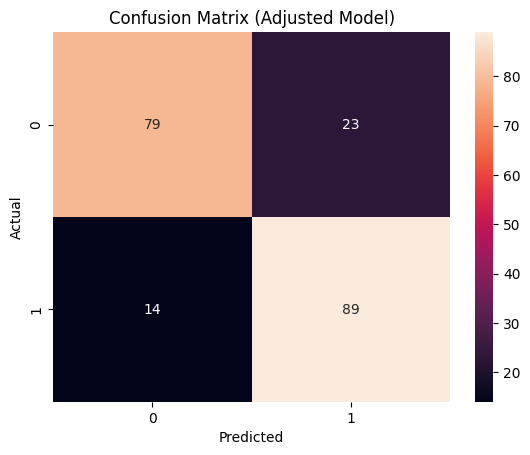

In [7]:
# Load necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/heart.csv')

# Perform exploratory data analysis
print(data.head())
print(data.info())
print(data.describe())

# Handle missing values
data = data.dropna()

# Convert categorical variables to numeric
data['target'] = data['target'].map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

# Select features for analysis
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
            'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

X = data[features]
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the kNN classifier with adjusted parameters
knn_adjusted = KNeighborsClassifier(n_neighbors=20, weights='uniform')
knn_adjusted.fit(X_train, y_train)

# Predictions
y_pred_adjusted = knn_adjusted.predict(X_test)

# Evaluate the adjusted model
accuracy_adjusted = accuracy_score(y_test, y_pred_adjusted)
precision_adjusted = precision_score(y_test, y_pred_adjusted)
recall_adjusted = recall_score(y_test, y_pred_adjusted)
f1_adjusted = f1_score(y_test, y_pred_adjusted)

print("Adjusted Accuracy Score:", accuracy_adjusted)
print("Adjusted Precision Score:", precision_adjusted)
print("Adjusted Recall Score:", recall_adjusted)
print("Adjusted F1 Score:", f1_adjusted)

# Confusion Matrix for the adjusted model
conf_matrix_adjusted = confusion_matrix(y_test, y_pred_adjusted)
sns.heatmap(conf_matrix_adjusted, annot=True, fmt='g')
plt.title('Confusion Matrix (Adjusted Model)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
